In [5]:
# Importing Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [46]:
# Files available in our data sets
import os
print(os.listdir("../input/twitter-sentiment-analysis-hatred-speech"))

['train.csv', 'test.csv']


In [78]:
#loading data
train_df = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/train.csv")
test_df = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/test.csv")

In [79]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [80]:
#Testing Data Set information
test_df.head()
# test data set have no label column

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


### wall the tweets are raw and we have to pre process the text

In [81]:
# Training Data Set Information
print("=============Train Data============")
print(train_df.info())
print("=============Test data=============")
print(test_df.info())

=============Train Data============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
=============Test data=============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


In [82]:
#lets combine both data set
# merge both train and test data set
merge_df = train_df.append(test_df, ignore_index = True, sort = False)
merge_df.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [83]:
merge_df.describe()
# we can see 31962 column has label that are train data set.

,id,label
count,49159.000000,31962.000000
mean,24580.000000,0.070146
std,14191.125278,0.255397
min,1.000000,0.000000
25%,12290.500000,0.000000
50%,24580.000000,0.000000
75%,36869.500000,0.000000
max,49159.000000,1.000000


## Data preparation

In [84]:
# remove user information from tweet
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [85]:
#converting html
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [86]:
# Cleaned tweet
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
merge_df['clean_tweet'] = merge_df['tweet'].apply(lambda x: html_parser.unescape(x))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...


In [87]:
# remove twitter handles (@user)
merge_df['clean_tweet'] = np.vectorize(remove_pattern)(merge_df['clean_tweet'], "@[\w]*")
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [88]:
#Converting to lower case
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: x.lower())
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [89]:
# short word lookup
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [90]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [91]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


In [92]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [93]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


In [94]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [95]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


In [96]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ð ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


In [97]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


In [98]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
merge_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


In [99]:
merge_df['clean_tweet'] = merge_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
merge_df['clean_tweet'][0:5]

0    when father is dysfunctional and is so selfish...
1    thanks for lyft credit cannot use cause they d...
2                                  bihday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
Name: clean_tweet, dtype: object

In [100]:
from textblob import TextBlob

In [115]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this char??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this chair??


In [117]:
# we can see all the similar matches our first error along with the probability score.
blob.words[6].spellcheck()

[('chair', 0.5720338983050848),
 ('charm', 0.13135593220338984),
 ('cher', 0.1059322033898305),
 ('chart', 0.05084745762711865),
 ('chat', 0.038135593220338986),
 ('chap', 0.038135593220338986),
 ('car', 0.029661016949152543),
 ('czar', 0.025423728813559324),
 ('chas', 0.00423728813559322),
 ('chary', 0.00423728813559322)]

In [119]:
# Just checking the performance of spell correction
text = merge_df['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    when father is dysfunctional and is so selfish...
1    thanks for left credit cannot use cause they d...
2                                  midday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
5    huge fan fare and big talking before they leav...
6                               camping tomorrow dandy
7    the next school year is the year for exam cann...
8    we won love the land allen caps champions clev...
9                   welcome here am it has it is so gr
Name: clean_tweet, dtype: object

In [120]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [121]:
# Creating token for the clean tweets
merge_df['tweet_token'] = merge_df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
merge_df.head(10)

,id,label,tweet,clean_tweet,tweet_token
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ..."
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]"
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they leav...,"[huge, fan, fare, and, big, talking, before, t..."
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]"
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ..."
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi..."
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here am it has it is so gr,"[welcome, here, am, it, has, it, is, so, gr]"


In [122]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [123]:
# Created new columns of tokens - where stop words are being removed
merge_df['tweet_token_filtered'] = merge_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
merge_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ..."
1,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee..."
2,"[bihday, your, majesty]","[bihday, majesty]"
3,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]"
4,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"
5,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ..."
6,"[camping, tomorrow, danny]","[camping, tomorrow, danny]"
7,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo..."
8,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland..."
9,"[welcome, here, am, it, has, it, is, so, gr]","[welcome, gr]"


In [124]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [125]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
merge_df['tweet_stemmed'] = merge_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
merge_df['tweet_stemmed'].head(10)

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit use caus offer wheelchair va...
2                                       bihday majesti
3                                 model love take time
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6                                  camp tomorrow danni
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                            welcom gr
Name: tweet_stemmed, dtype: object

In [126]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [127]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
merge_df['tweet_lemmatized'] = merge_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
merge_df['tweet_lemmatized'].head(10)

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6                               camping tomorrow danny
7    next school year year exam think school exam h...
8    love land allin cavs champion cleveland clevel...
9                                           welcome gr
Name: tweet_lemmatized, dtype: object

In [129]:
merge_df.head(10)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]",model love take time,model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they leav...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...",huge fan fare big talk leav chao pay disput ge...,huge fan fare big talking leave chaos pay disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]",camp tomorrow danni,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo...",next school year year exam think school exam h...,next school year year exam think school exam h...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...",love land allin cav champion cleveland clevela...,love land allin cavs champion cleveland clevel...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here am it has it is so gr,"[welcome, here, am, it, has, it, is, so, gr]","[welcome, gr]",welcom gr,welcome gr


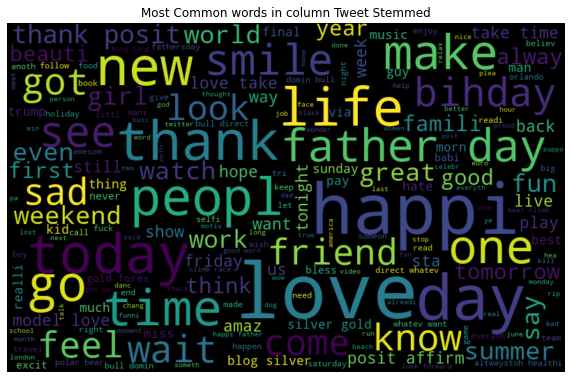

In [130]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in merge_df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

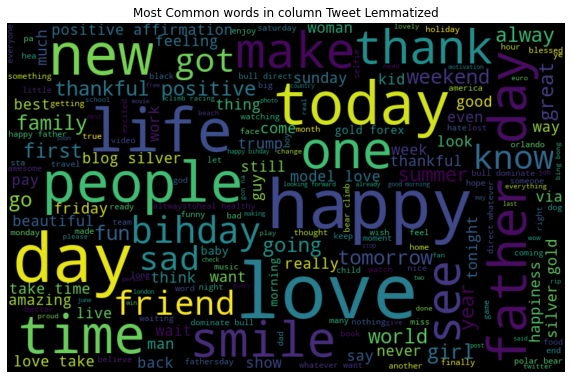

In [131]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in merge_df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

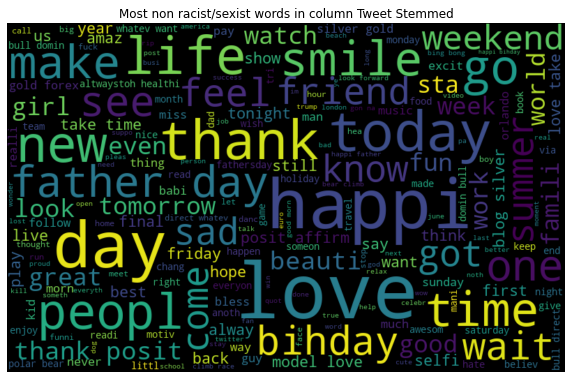

In [132]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in merge_df['tweet_stemmed'][merge_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

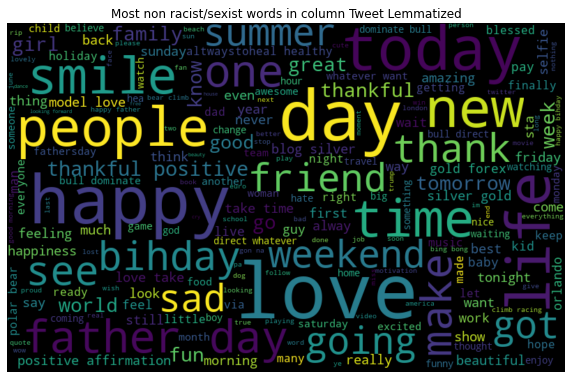

In [133]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in merge_df['tweet_lemmatized'][merge_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()

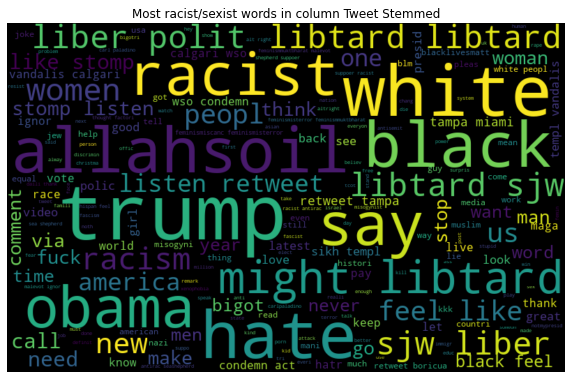

In [134]:
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in merge_df['tweet_stemmed'][merge_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

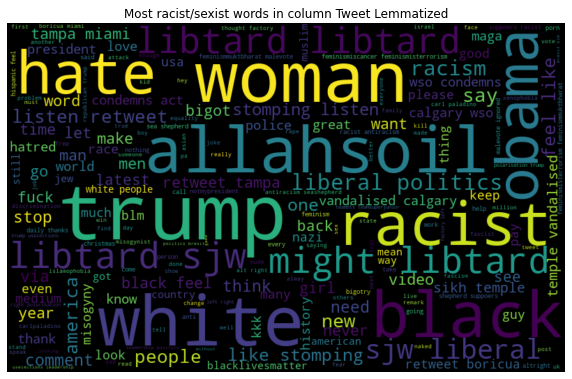

In [135]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in merge_df['tweet_lemmatized'][merge_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

In [136]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [137]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(merge_df['tweet_stemmed'])
bow_stem

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 203380 stored elements in Compressed Sparse Row format>

In [138]:
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(merge_df['tweet_lemmatized'])
bow_lemm

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 187347 stored elements in Compressed Sparse Row format>

In [139]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [140]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(merge_df['tweet_stemmed'])
tfidf_stem

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 203380 stored elements in Compressed Sparse Row format>

In [141]:
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm = tfidf_vectorizer.fit_transform(merge_df['tweet_lemmatized'])
tfidf_lemm

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 187347 stored elements in Compressed Sparse Row format>

In [142]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [143]:
# A.1 For columns "combine_df['tweet_stemmed']"
train_bow = bow_stem[:31962,:]
test_bow = bow_stem[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

0.5558312655086849


In [144]:
# A.2 For columns "combine_df['tweet_lemmatized']"
train_bow = bow_lemm[:31962,:]
test_bow = bow_lemm[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A2)

0.5372112917023096


In [145]:
# B.1 For columns "combine_df['tweet_stemmed']"
train_tfidf = tfidf_stem[:31962,:]
test_tfidf = tfidf_stem[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(B1)

0.5424028268551236


In [146]:
# B.2 For columns "combine_df['tweet_lemmatized']"
train_tfidf = tfidf_lemm[:31962,:]
test_tfidf = tfidf_lemm[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(B2)

0.5392857142857143


In [148]:
print("F1 - Score Chart")
print("* F1-Score - Model using Bag-of-Words features")
print("   F1-Score = ",A1," - For column tweets are stemmed")
print("   F1-Score = ",A2," - For column tweets are Lemmatized")
print("* F1-Score - Model using TF-IDF features")
print("   F1-Score = ",B1," - For column tweets are stemmed")
print("   F1-Score = ",B2," - For column tweets are Lemmatized")


F1 - Score Chart
* F1-Score - Model using Bag-of-Words features
   F1-Score =  0.5558312655086849  - For column tweets are stemmed
   F1-Score =  0.5372112917023096  - For column tweets are Lemmatized
* F1-Score - Model using TF-IDF features
   F1-Score =  0.5424028268551236  - For column tweets are stemmed
   F1-Score =  0.5392857142857143  - For column tweets are Lemmatized
